       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0     

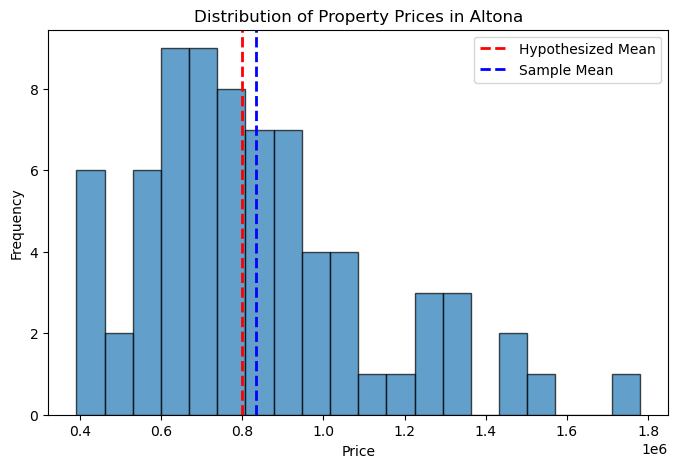

Sample Mean Price: 834830.41
Standard Deviation: 291546.05
Sample Size: 74
T-Statistic: 1.0277
P-Value: 0.1537
Fail to reject the null hypothesis: No significant increase in property prices.


In [3]:
#1. For the suburb Altona, it is postulated that a typical property sells for $800,000. 
#Use the data at hand to test this assumption. Is the typical property price really $800,000 or has it increased? 
#Use a significance level of 5%. 

import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load dataset
file_path = 'C:/Users/HP/Desktop/property.csv'  

df = pd.read_csv(file_path)

print(df.head())

# Filter data for Altona
altona_df = df[df['Suburb'] == 'Altona']

# Summary statistics
mean_price = altona_df['Price'].mean()
std_price = altona_df['Price'].std()
n = len(altona_df)

# Hypothesis testing
mu_0 = 800000  # Assumed population mean

# Perform one-sample t-test (one-tailed, greater than test)
t_stat, p_value = stats.ttest_1samp(altona_df['Price'].dropna(), mu_0, alternative='greater')

# Visualization
plt.figure(figsize=(8,5))
plt.hist(altona_df['Price'].dropna(), bins=20, edgecolor='black', alpha=0.7)
plt.axvline(mu_0, color='red', linestyle='dashed', linewidth=2, label='Hypothesized Mean')
plt.axvline(mean_price, color='blue', linestyle='dashed', linewidth=2, label='Sample Mean')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Property Prices in Altona')
plt.legend()
plt.show()

# Print results
print(f"Sample Mean Price: {mean_price:.2f}")
print(f"Standard Deviation: {std_price:.2f}")
print(f"Sample Size: {n}")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The typical property price in Altona has significantly increased.")
else:
    print("Fail to reject the null hypothesis: No significant increase in property prices.")

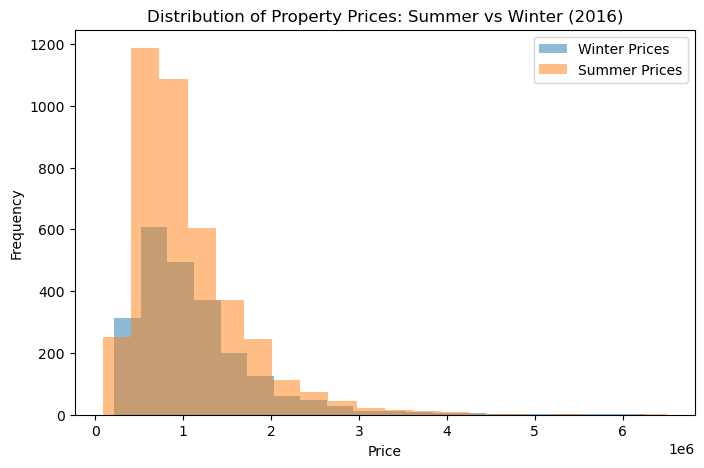

Winter Mean Price: 1116647.59
Summer Mean Price: 1048054.73
T-Statistic: 4.0434
P-Value: 0.0001
Reject the null hypothesis: Significant difference in property prices between summer and winter months.


In [2]:
#2. For the year 2016, is there any difference in prices of properties sold in the summer months vs winter months? 
# Consider months from October till March as winter months and the rest as summer months. Use a significance level of 5%. 

# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

# Filter data for year 2016
df_2016 = df[df["Date"].dt.year == 2016]

# Define summer and winter months
winter_months = [10, 11, 12, 1, 2, 3]  # October - March
summer_months = [4, 5, 6, 7, 8, 9]  # April - September

# Separate property prices for summer and winter months
winter_prices = df_2016[df_2016["Date"].dt.month.isin(winter_months)]["Price"]
summer_prices = df_2016[df_2016["Date"].dt.month.isin(summer_months)]["Price"]

# Perform Independent T-test
t_stat, p_value = stats.ttest_ind(winter_prices, summer_prices, nan_policy='omit')

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(winter_prices, bins=20, alpha=0.5, label="Winter Prices")
plt.hist(summer_prices, bins=20, alpha=0.5, label="Summer Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Property Prices: Summer vs Winter (2016)")
plt.show()

# Print results
print(f"Winter Mean Price: {winter_prices.mean():.2f}")
print(f"Summer Mean Price: {summer_prices.mean():.2f}")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in property prices between summer and winter months.")
else:
    print("Fail to reject the null hypothesis: No significant difference in property prices.")


In [6]:
# 3. For the suburb of Abbotsford, what is the probability that out of 10 properties sold, 3 will not have car parking? 
# Use the column car in the dataset. Round off your answer to 3 decimal places.


# Filter for suburb 'Abbotsford'
abbotsford_data = df[df["Suburb"] == "Abbotsford"]

# Calculate probability (p) of a property having no car parking (Car = 0)
p_no_car = (abbotsford_data["Car"] == 0).mean()

# Given n = 10, k = 3 (3 properties without car parking)
n = 10
k = 3

# Calculate binomial probability
probability = stats.binom.pmf(k, n, p_no_car)

# Print results
print(f"Probability that out of 10 properties, exactly 3 will not have car parking: {probability:.3f}")


Probability that out of 10 properties, exactly 3 will not have car parking: 0.260


In [7]:
# 4. In the suburb of Abbotsford, what are the chances of finding a property with 3 rooms? 
# Round your answer to 3 decimal places. 

# Filter data for Abbotsford
abbotsford_data = df[df['Suburb'] == 'Abbotsford']

# Count total properties in Abbotsford
total_properties = len(abbotsford_data)

# Count properties with exactly 3 rooms
three_room_properties = len(abbotsford_data[abbotsford_data['Rooms'] == 3])

# Calculate probability
probability_3_rooms = three_room_properties / total_properties

# Round to 3 decimal places
probability_3_rooms = round(probability_3_rooms, 3)

# Print the result
print(f"Probability of finding a property with 3 rooms in Abbotsford: {probability_3_rooms}")

Probability of finding a property with 3 rooms in Abbotsford: 0.357


In [8]:
# 5. In the suburb of Abbotsford, what are the chances of finding a property with 2 bathrooms? 
# Round your answer to 3 decimal places. 

# Filter data for Abbotsford
abbotsford_data = df[df['Suburb'] == 'Abbotsford']

# Count total properties in Abbotsford
total_properties = len(abbotsford_data)

# Count properties with exactly 2 bathrooms
two_bathroom_properties = len(abbotsford_data[abbotsford_data['Bathroom'] == 2])

# Calculate probability
probability_2_bathrooms = two_bathroom_properties / total_properties

# Round to 3 decimal places
probability_2_bathrooms = round(probability_2_bathrooms, 3)

# Print the result
print(f"Probability of finding a property with 2 bathrooms in Abbotsford: {probability_2_bathrooms}")

Probability of finding a property with 2 bathrooms in Abbotsford: 0.339
